<a href="https://colab.research.google.com/github/Akhilps04/Project-/blob/main/cropprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

final model


Epoch 1/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0715 - loss: 3.0691 - val_accuracy: 0.4523 - val_loss: 2.9124
Epoch 2/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1935 - loss: 2.8867 - val_accuracy: 0.8591 - val_loss: 2.5844
Epoch 3/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3415 - loss: 2.5679 - val_accuracy: 0.9455 - val_loss: 2.0400
Epoch 4/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4698 - loss: 2.1481 - val_accuracy: 0.9909 - val_loss: 1.4007
Epoch 5/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5881 - loss: 1.6992 - val_accuracy: 0.9909 - val_loss: 0.8642
Epoch 6/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6524 - loss: 1.3367 - val_accuracy: 0.9909 - val_loss: 0.5186
Epoch 7/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7139 - loss: 1.1158 - val_accuracy: 0.9909 - val_loss: 0.3290
Epoch 8/50
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7538 - loss: 0.9508 - val_accuracy: 0.9909 - val_loss:

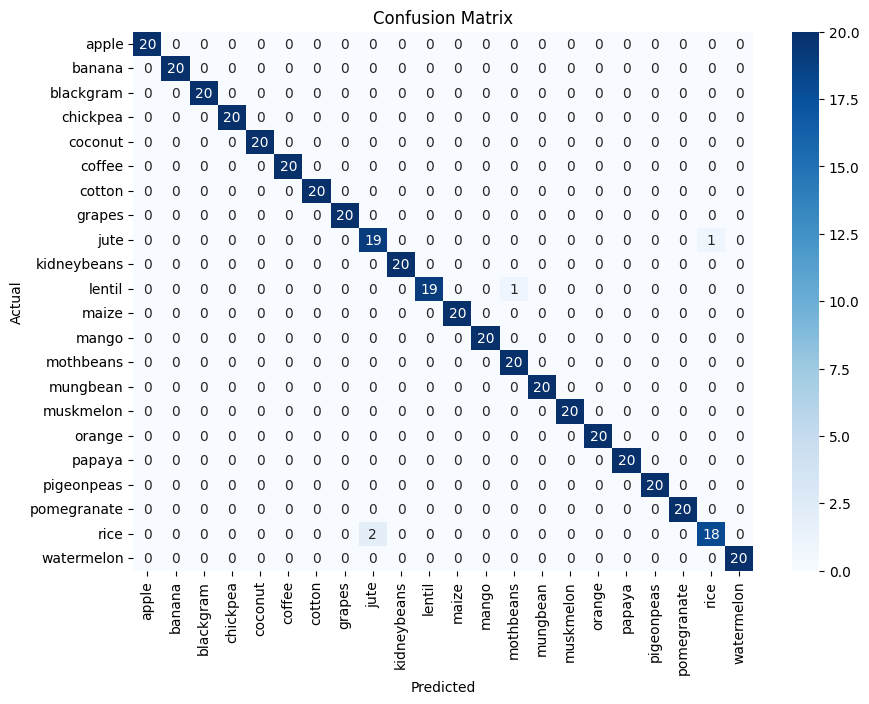

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


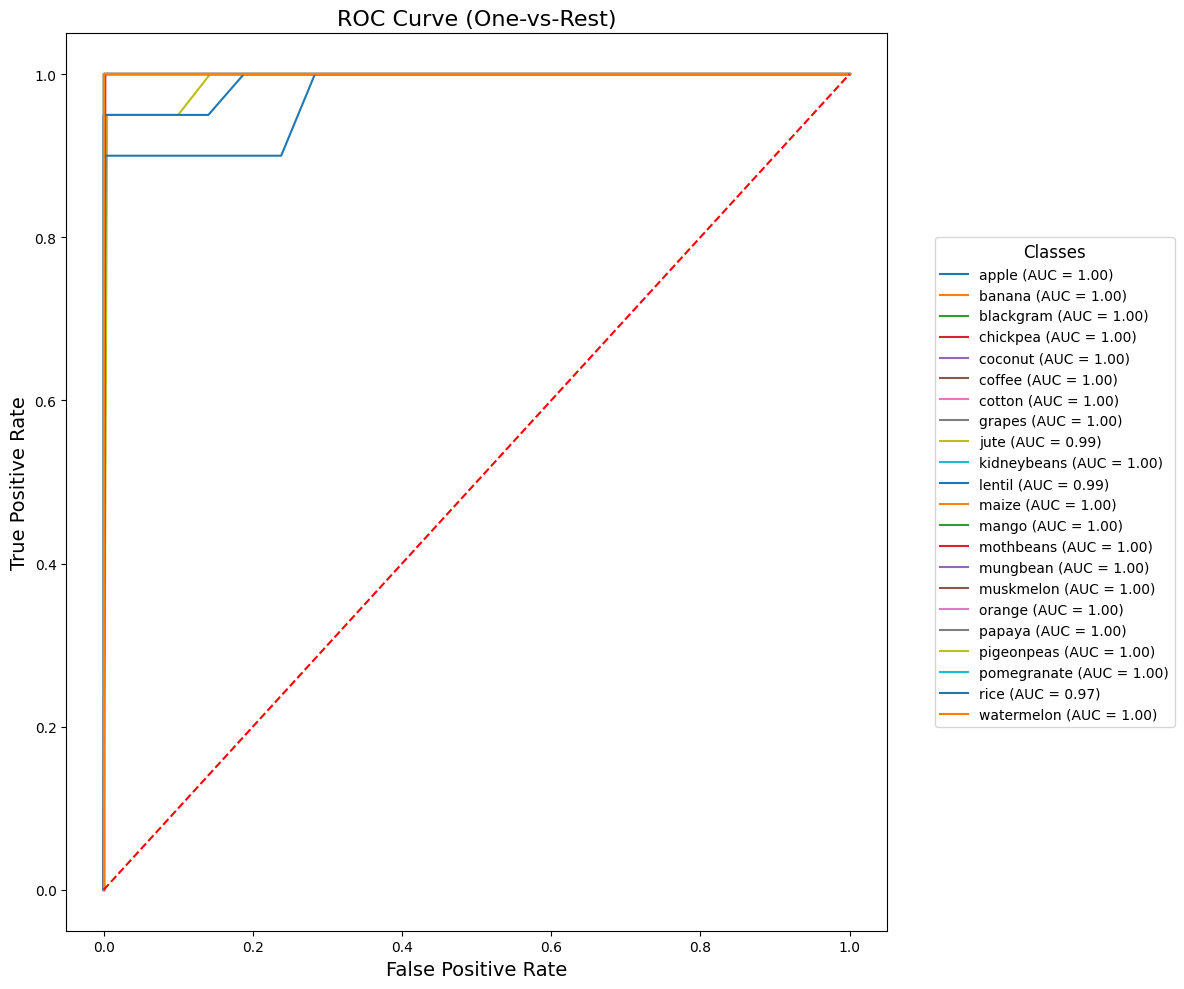

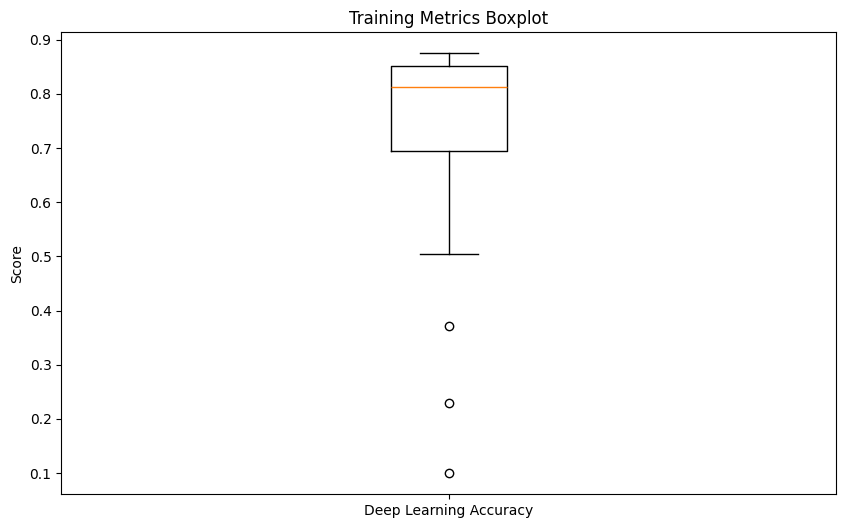

Cross-Validation Results:
Accuracy: 0.9932 ± 0.0025
Precision: 0.9933 ± 0.0025
Recall: 0.9932 ± 0.0025
F1-Score: 0.9932 ± 0.0025


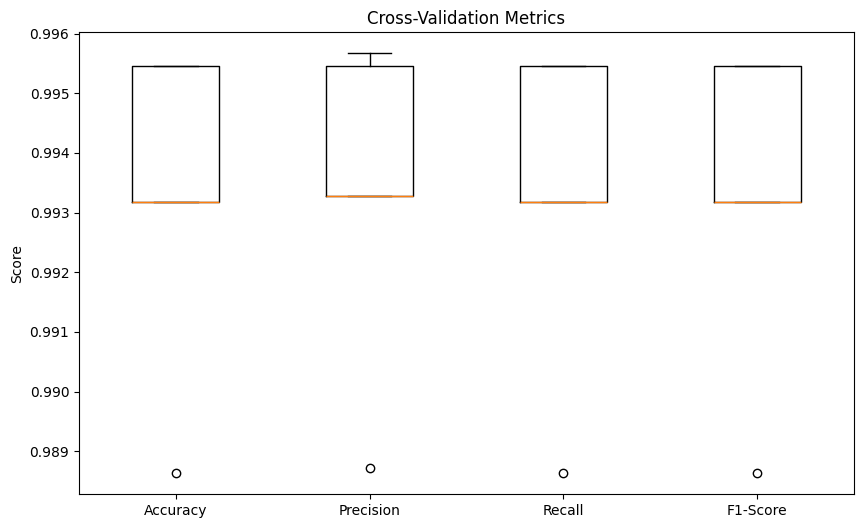

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    auc,
    confusion_matrix,
    classification_report,
)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# Load your dataset
dataset = pd.read_csv('/content/drive/MyDrive/Crop_recommendation.csv')  # Replace with your dataset path

# Encode the categorical target variable
label_encoder = LabelEncoder()
dataset['label'] = label_encoder.fit_transform(dataset['label'])

# Define features and target variable
X = dataset.drop(columns=['label'])
y = dataset['label']

# Convert target variable to categorical (one-hot encoding) for deep learning
y_categorical = to_categorical(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42, stratify=y
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 1: Naive Bayes for probabilistic predictions
nb_model = GaussianNB()
nb_model.fit(X_train, y_train.argmax(axis=1))  # Train Naive Bayes on raw features
nb_preds_train = nb_model.predict_proba(X_train)
nb_preds_test = nb_model.predict_proba(X_test)

# Step 2: Decision Tree for classification
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(nb_preds_train, y_train.argmax(axis=1))  # Train Decision Tree on Naive Bayes outputs
dt_preds_test = dt_model.predict_proba(nb_preds_test)

# Step 3: Deep Learning for advanced pattern recognition
deep_model = Sequential([
    Input(shape=(dt_preds_test.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(32, activation='relu'),
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(y_categorical.shape[1], activation='softmax')  # Output layer
])

# Compile the model
deep_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add Early Stopping to avoid overfitting
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=5,          # Stop after 5 epochs of no improvement
    restore_best_weights=True  # Restore weights of the best epoch
)

# Train Deep Learning model on Decision Tree predictions
history = deep_model.fit(
    dt_model.predict_proba(nb_preds_train), y_train,
    validation_data=(dt_preds_test, y_test),
    epochs=50,  # Increased epoch limit for better early stopping
    batch_size=32,
    verbose=1,
    callbacks=[early_stopping]  # Apply Early Stopping
)

# Evaluate the hybrid model on the test set
y_test_pred = deep_model.predict(dt_preds_test).argmax(axis=1)
y_test_true = y_test.argmax(axis=1)

# Metrics
accuracy = accuracy_score(y_test_true, y_test_pred)
precision = precision_score(y_test_true, y_test_pred, average='weighted')
recall = recall_score(y_test_true, y_test_pred, average='weighted')
f1 = f1_score(y_test_true, y_test_pred, average='weighted')

print(f"Test Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test_true, y_test_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve (One-vs-Rest strategy for multi-class classification)
plt.figure(figsize=(12, 10))  # Increase figure size for better clarity

for i in range(len(label_encoder.classes_)):
    fpr, tpr, _ = roc_curve(y_test[:, i], deep_model.predict(dt_preds_test)[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{label_encoder.classes_[i]} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'r--')  # Add diagonal for reference
plt.title('ROC Curve (One-vs-Rest)', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)

# Add a scrollable legend to handle many classes
legend = plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=10, title="Classes")
plt.setp(legend.get_title(), fontsize=12)  # Increase legend title font size

plt.tight_layout()  # Ensure everything fits in the figure
plt.show()

# Boxplots for training metrics
plt.figure(figsize=(10, 6))
plt.boxplot(history.history['accuracy'], labels=['Deep Learning Accuracy'])
plt.title('Training Metrics Boxplot')
plt.ylabel('Score')
plt.show()

# Print cross-validation results
print(f"Cross-Validation Results:")
print(f"Accuracy: {np.mean(cv_accuracy):.4f} ± {np.std(cv_accuracy):.4f}")
print(f"Precision: {np.mean(cv_precision):.4f} ± {np.std(cv_precision):.4f}")
print(f"Recall: {np.mean(cv_recall):.4f} ± {np.std(cv_recall):.4f}")
print(f"F1-Score: {np.mean(cv_f1):.4f} ± {np.std(cv_f1):.4f}")

# Plot cross-validation metrics
plt.figure(figsize=(10, 6))
plt.boxplot([cv_accuracy, cv_precision, cv_recall, cv_f1], labels=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
plt.title('Cross-Validation Metrics')
plt.ylabel('Score')
plt.show()
